R^2 1.0
RMSE: 
 0.0


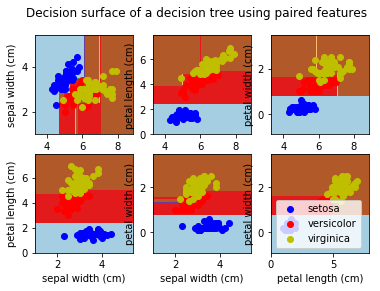

In [2]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Sun Jul  2 18:45:51 2017

@author: jerry
"""

#DT
from sklearn.datasets import load_iris
from sklearn import datasets
from sklearn import tree
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


iris = datasets.load_iris()

df_data = pd.DataFrame(iris['data'], columns=iris.feature_names)
df_target = pd.DataFrame(iris['target'], columns=['Target'])
df = pd.concat([df_data,df_target],axis=1)

#建立決策樹
dtc = tree.DecisionTreeClassifier()

X_train, X_test, y_train, y_test = train_test_split(df_data, df_target,
                                                    test_size = 0.3,
                                                    random_state=42)

dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('R^2', dtc.score(X_test, y_test))
print('RMSE: \n', rmse)





#####ploting with Scatter plot 
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier

n_classes = 3
plot_colors = "bry"
plot_step = 0.02

iris = datasets.load_iris()

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
    X = iris.data[:, pair]
    y = iris.target

    # Train
    clf = DecisionTreeClassifier().fit(X, y)

    # Plot the decision boundary
    plt.subplot(2, 3, pairidx + 1)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)

    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])
    plt.axis("tight")

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                    cmap=plt.cm.Paired)

    plt.axis("tight")

plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend()
plt.show()


SyntaxError: invalid syntax (<ipython-input-6-897e409789d5>, line 1)